# Continuous time linear dynamical systems

First order homogeneous differential equations.

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
axs_range = {'x_min': -1.0, 'x_max': 1.0,
             'y_min': -1.0, 'y_max': 1.0}

def plot_vector_field(A, axs, axs_range):
    x = np.linspace(min(axs_range['x_min'], -1.0), max(axs_range['x_max'], 1.0), 250)
    y = np.linspace(min(axs_range['y_min'], -1.0), max(axs_range['y_max'], 1.0), 250)

    X, Y = np.meshgrid(x, y)
    u, v = np.zeros(X.shape), np.zeros(Y.shape)
    speed = np.zeros(X.shape)
    NI, NJ = Y.shape

    for i in range(NI):
        for j in range(NJ):
            x = X[i, j]
            y = Y[i, j]

            vec_in = np.array([x, y])
            vec_out = A @ vec_in
            s = (vec_out - vec_in)

            u[i, j] = s[0]
            v[i, j] = s[1]
            speed[i, j] = np.linalg.norm(vec_out - vec_in)

    # speed = speed / speed.max()
    strm = axs.streamplot(X, Y, u, v, color=speed, linewidth=0.5, arrowsize=1.0, density=1.0)

    return strm

### Case 1: $F = \begin{pmatrix} \lambda & 1 \\ 0 & \lambda \end{pmatrix}$

- one Jordan block of order 2
- real eigenvalue
- what happens if $\lambda > 0$ ?
- what happens if $\lambda < 0$ ?
- what happens if $\lambda = 0$ ?

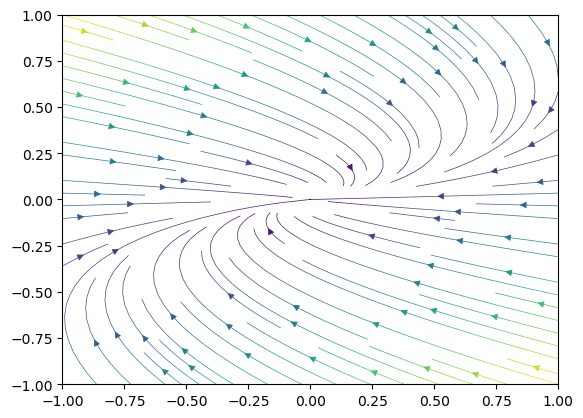

In [3]:
eig_val = -0.5
fig, axs = plt.subplots()

F = np.array([[eig_val, 1.0], [0.0, eig_val]])
A = scipy.linalg.expm(F)

plot_vector_field(A, axs, axs_range);

### Case 2: $F = \begin{pmatrix} \lambda & 0 \\ 0 & \lambda^{\ast} \end{pmatrix}$
- two elementary Jordan blocks
- complex conjugate eigenvalue pair $\lambda = \alpha + j \beta$

- what happens if $\alpha = 0.0$

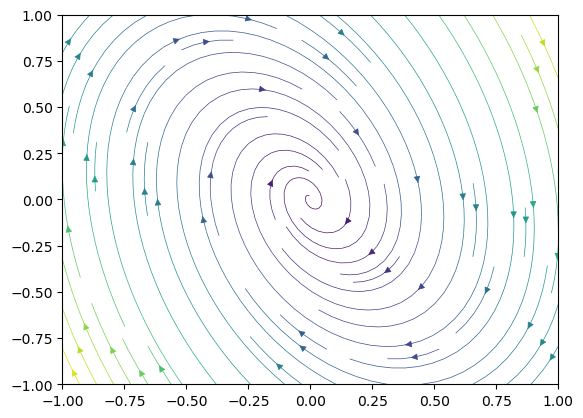

In [98]:
eig_val = -0.0 - 0.5j
fig, axs = plt.subplots()

v1 = np.array([np.random.randn() + 1.0j*np.random.randn(), np.random.randn() + 1.0j*np.random.randn()])
v2 = v1.conjugate()

T = np.array([v1, v2]).T
T_inv = np.linalg.inv(T)

F = np.array([[eig_val, 0.0], [0.0, eig_val.conjugate()]])
A = T @ scipy.linalg.expm(F) @ T_inv
A = A.real

plot_vector_field(A, axs, axs_range);

### Case 3: $F = \begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix}$
- two elementary Jordan blocks
- real eigenvalues
- what happens if $\lambda_1 = \lambda_2$ ?

In [ ]:
eig_val_1 = 0.5
eig_val_2 = -0.5

fig, axs = plt.subplots()

F = np.array([[eig_val_1, 0.0], [0.0, eig_val_2]])
A = scipy.linalg.expm(F)

plot_vector_field(A, axs, axs_range);